In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import tensor as T

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import berp.generators.thresholded_recognition_simple as gen
import berp.models.reindexing_regression as rr

In [5]:
params = rr.ModelParameters(lambda_=T(1.),
                            confusion=gen.phoneme_confusion,
                            threshold=T(0.7),
                            a=T(0.4),
                            b=T(0.1),
                            coef=T([0., -1.]))

In [6]:
ds = gen.sample_dataset(params)

In [7]:
ds.phoneme_onsets

tensor([[ 0.1791,  0.2260,  0.2924,  0.3441,  0.4254],
        [ 0.5177,  0.5674,  0.6555,  0.7355,  0.8201],
        [ 0.8622,  0.9164,  0.9727,  1.0412,  1.1259],
        [ 1.2712,  1.3330,  1.4133,  1.5100,  1.6036],
        [ 1.5689,  1.6410,  1.6814,  1.7377,  1.7972],
        [ 1.9172,  2.0013,  2.0903,  2.1367,  2.2200],
        [ 2.3051,  2.3530,  2.4125,  2.5065,  2.6012],
        [ 2.6291,  2.6889,  2.7539,  2.8245,  2.8753],
        [ 3.0250,  3.0959,  3.1848,  3.2749,  3.3627],
        [ 3.3561,  3.4526,  3.4988,  3.5440,  3.5880],
        [ 3.6757,  3.7612,  3.8360,  3.8976,  3.9633],
        [ 4.0514,  4.1268,  4.2145,  4.2775,  4.3712],
        [ 4.4324,  4.5137,  4.6009,  4.6970,  4.7832],
        [ 4.7637,  4.8096,  4.8788,  4.9694,  5.0592],
        [ 5.1392,  5.2240,  5.3180,  5.3940,  5.4836],
        [ 5.4000,  5.4463,  5.4865,  5.5312,  5.6056],
        [ 5.6595,  5.7062,  5.7494,  5.8353,  5.8775],
        [ 5.9291,  5.9716,  6.0305,  6.0950,  6.1728],
        [ 

In [8]:
rr.predictive_model(ds.p_word, ds.candidate_phonemes, confusion=ds.params.confusion, lambda_=ds.params.lambda_)

tensor([[6.8777e-01, 9.7782e-01, 9.9944e-01, 9.9999e-01, 1.0000e+00],
        [1.1190e-01, 6.6706e-01, 9.7807e-01, 9.8851e-01, 9.9993e-01],
        [1.1500e-01, 6.4717e-01, 9.8391e-01, 9.9946e-01, 9.9997e-01],
        [7.1813e-01, 9.6168e-01, 9.9759e-01, 9.9994e-01, 9.9997e-01],
        [7.0862e-01, 9.3263e-01, 9.9763e-01, 9.9981e-01, 9.9999e-01],
        [1.2110e-01, 6.9061e-01, 9.6334e-01, 9.9722e-01, 9.9752e-01],
        [5.3099e-01, 8.3740e-01, 9.8667e-01, 9.9945e-01, 9.9996e-01],
        [5.1119e-02, 4.2840e-01, 9.2182e-01, 9.9586e-01, 9.9973e-01],
        [8.0496e-01, 9.6604e-01, 9.9782e-01, 9.9990e-01, 9.9999e-01],
        [5.7870e-01, 9.6282e-01, 9.9893e-01, 9.9994e-01, 1.0000e+00],
        [6.3633e-01, 9.2008e-01, 9.9530e-01, 9.9992e-01, 9.9999e-01],
        [2.6208e-01, 9.3749e-01, 9.9691e-01, 9.9986e-01, 9.9999e-01],
        [3.9588e-01, 9.4104e-01, 9.8541e-01, 9.9815e-01, 9.9997e-01],
        [2.3883e-01, 8.2387e-01, 9.9187e-01, 9.9917e-01, 9.9993e-01],
        [9.2184e-01,

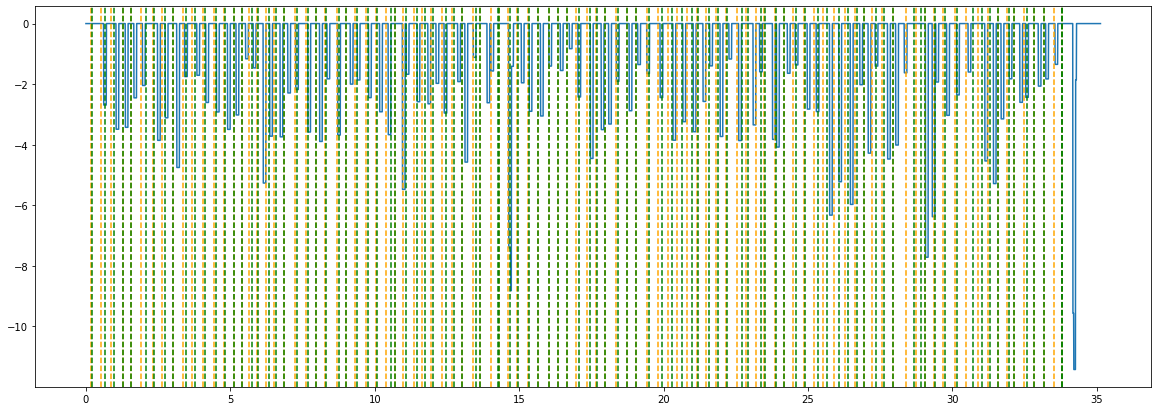

In [9]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.plot(np.arange(ds.Y.shape[0]) / ds.sample_rate, ds.Y[:, 0])

for word_onset in ds.phoneme_onsets[:, 0]:
    ax.axvline(word_onset, c="orange", linestyle="--")
for rec_onset in ds.recognition_onsets:
    ax.axvline(rec_onset, c="green", linestyle="--")